# Exercício 1

![alt text](enunciado_1.png)

![alt text](fluxograma_1.png)

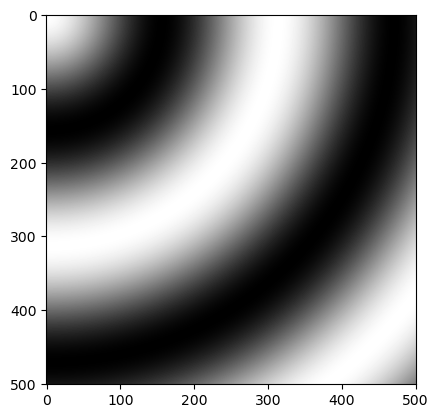

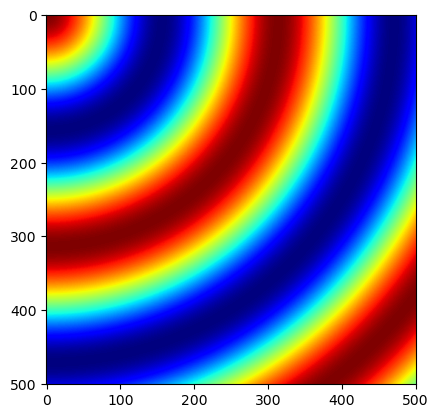

In [11]:
import pylab as pl
from numpy import loadtxt

# Obter os dados do arquivo circular.txt
data = loadtxt("circular.txt",float)

# Exibir os dados como uma imagem
pl.imshow(data)
pl.gray()
pl.show()

pl.imshow(data)
pl.jet()
pl.show()



# Exercício 2

![alt text](enunciado2.1.png)

![alt text](enunciado2.2.png)

![alt text](enunciado2.3.png)

![alt text](fluxograma_2.png)

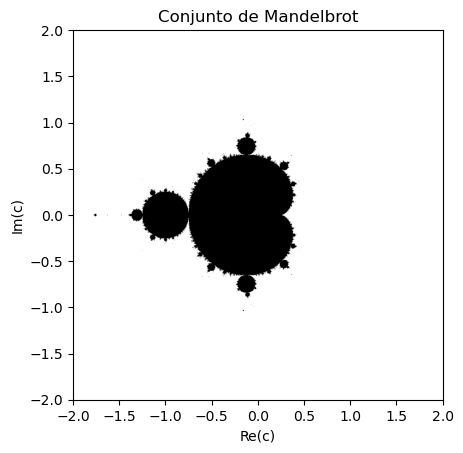

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Função que verifica se um ponto c está no conjunto de Mandelbrot
#Faz 100 iterações para a verificação 
def mandelbrot(c, max_iter=100):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return False  # Fora do conjunto
        z = z**2 + c
    return True  # Dentro do conjunto

# Função para gerar o grid do conjunto de Mandelbrot
def generate_mandelbrot(N=1000, x_min=-2, x_max=2, y_min=-2, y_max=2):
    x = np.linspace(x_min, x_max, N)
    y = np.linspace(y_min, y_max, N)
    mandelbrot_grid = np.zeros((N, N), dtype=bool)
    
    for i in range(N):
        for j in range(N):
            c = complex(x[i], y[j]) 
            mandelbrot_grid[j, i] = mandelbrot(c) # Verifica se c está no conjunto de Mandelbrot
     
    return mandelbrot_grid # Retorna a grade do conjunto de Mandelbrot

# Parâmetros
N = 1000  # Aumente para melhor resolução (ex: 500 ou 1000)

# Gerar e plotar
mandelbrot_set = generate_mandelbrot(N)
plt.imshow(mandelbrot_set, cmap='binary', extent=[-2, 2, -2, 2])
plt.title("Conjunto de Mandelbrot")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()

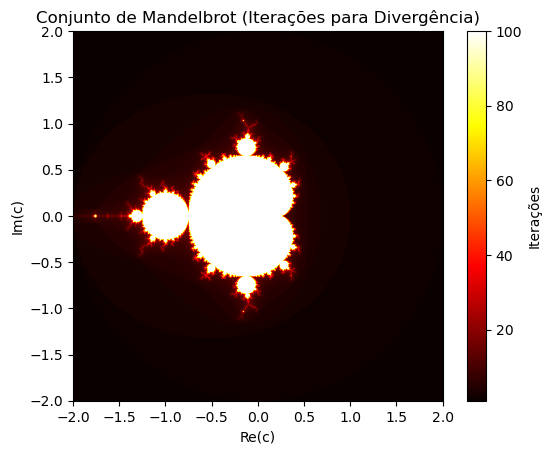

In [ ]:
# Função para gerar o conjunto de Mandelbrot com cores baseadas no número de iterações até a divergência
def mandelbrot_color(c, max_iter=100):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n  # Retorna o número de iterações
        z = z**2 + c
    return max_iter  # Nunca divergiu

# Função para gerar o grid do conjunto de Mandelbrot com cores
def generate_mandelbrot_color(N=100, max_iter=100):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N)
    iterations = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            c = complex(x[i], y[j])
            iterations[j, i] = mandelbrot_color(c, max_iter) # Verifica o número de iterações até a divergência
    
    return iterations

# Gerar e plotar versão colorida
mandelbrot_iter = generate_mandelbrot_color(N)
plt.imshow(mandelbrot_iter, cmap='hot', extent=[-2, 2, -2, 2])
plt.title("Conjunto de Mandelbrot (Iterações para Divergência)")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.colorbar(label="Iterações")
plt.show()

# Exercício 3

## Fonte dos dados

Título: Listagem dos dados de emissão da Carteira de Trabalho e Previdência Social - CTPS Dados 2021
link da planilha: https://docs.google.com/spreadsheets/d/1SCUSAbWc8OaVwQ-jeTK8L6bbLQm-nudovdwWlElx8K4/edit?gid=257100083#gid=257100083

fonte: dados.gov
link do site: https://dados.gov.br/dados/conjuntos-dados/carteira-de-trabalho-e-previdencia-social---ctps
acesso em: 20/06/2025

## Resolução do Exercício

![](enunciado_3.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

# Carregar os dados
df_original = pd.read_excel('Dados_CTPS_2021.xlsx')

df = df_original.copy()



In [13]:
#Analise inicial
df.info()
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11707 entries, 0 to 11706
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo Protocolo             11707 non-null  object 
 1   Data Protocolo             11707 non-null  object 
 2   Unnamed: 2                 0 non-null      float64
 3   Tipo CTPS                  11707 non-null  object 
 4   Data CTPS Gerada           11707 non-null  object 
 5   Nome Órgão                 11707 non-null  object 
 6   Nome Município Órgão       11707 non-null  object 
 7   Sigla UF Órgão             11707 non-null  object 
 8   Data Emissão               11707 non-null  object 
 9   Sexo                       11707 non-null  object 
 10  Nível Escolaridade         11707 non-null  object 
 11  Raça e Cor                 11707 non-null  object 
 12  Estado Civil               11707 non-null  object 
 13  Data Nascimento            11707 non-null  obj

['Tipo Protocolo',
 'Data Protocolo',
 'Unnamed: 2',
 'Tipo CTPS',
 'Data CTPS Gerada',
 'Nome Órgão',
 'Nome Município Órgão',
 'Sigla UF Órgão',
 'Data Emissão',
 'Sexo',
 'Nível Escolaridade',
 'Raça e Cor',
 'Estado Civil',
 'Data Nascimento',
 'Tipo Cidadania',
 'Nome do País',
 'Descrição Nacionalidade',
 'Nome Município Nascimento',
 'Sigla UF Nascimento']

C:\Users\vinic\AppData\Local\Temp\ipykernel_12608\2298328703.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


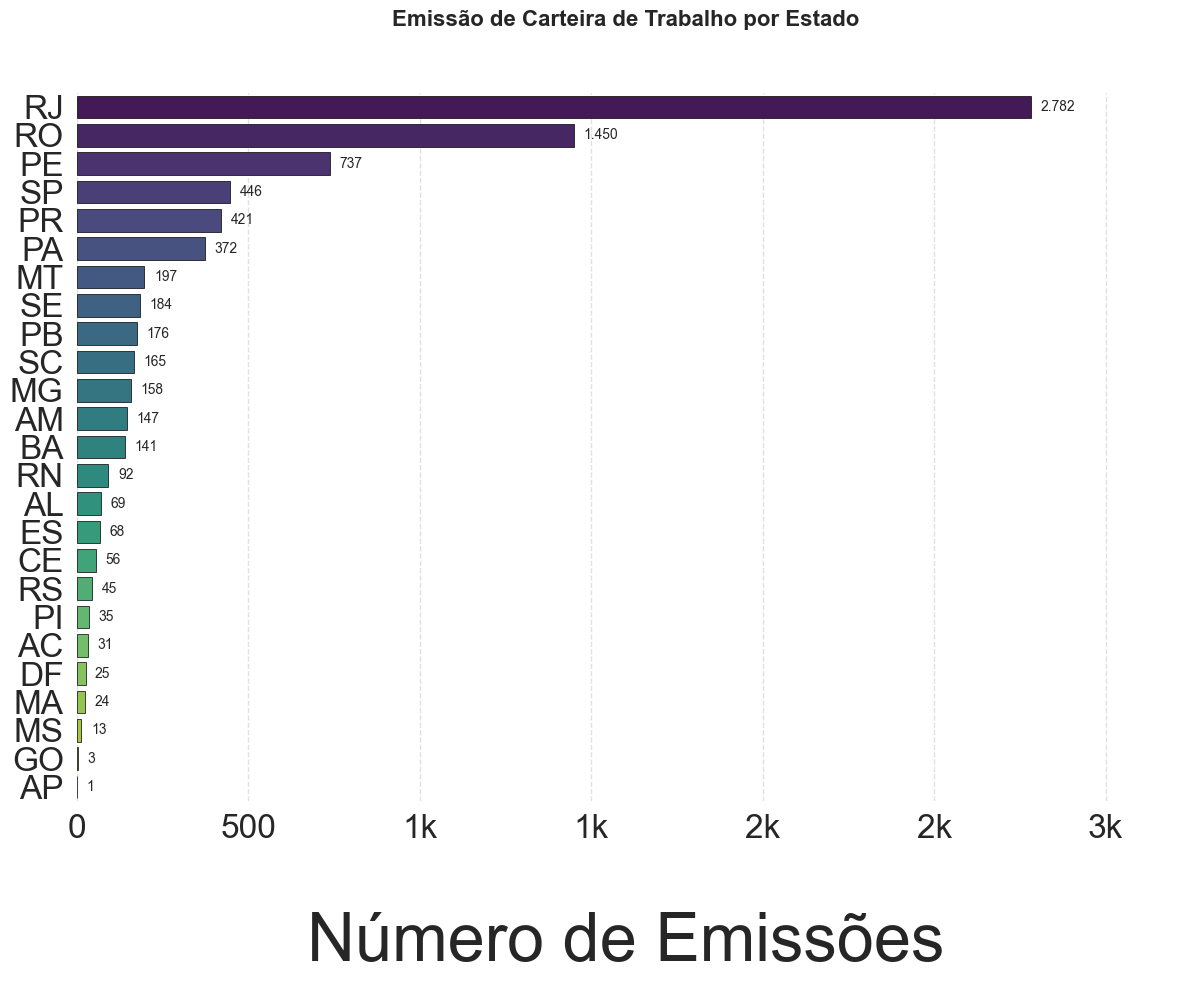

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df = df[df["Tipo Protocolo"] == "1ª Via"]  # Filtrar apenas registros de PRIMEIRA VIA

# Configuração do estilo

sns.set_theme(style="white")

# Preparação dos dados
contagem_estados = df['Sigla UF Órgão'].value_counts().reset_index()
contagem_estados.columns = ['Estado', 'Quantidade']
contagem_estados = contagem_estados.sort_values('Quantidade', ascending=False)

# Paleta de cores personalizada
cores = sns.color_palette("viridis", n_colors=len(contagem_estados))

# Criação da figura
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='Quantidade', 
    y='Estado', 
    data=contagem_estados, 
    palette=cores,
    edgecolor='black',
    linewidth=0.5
)

plt.yticks(fontsize=24)
plt.xticks(fontsize=24)

# Adicionando valores nas barras
for i, (valor, estado) in enumerate(zip(contagem_estados['Quantidade'], contagem_estados['Estado'])):
    ax.text(valor + max(contagem_estados['Quantidade'])*0.01, 
            i, 
            f'{valor:,}'.replace(',', '.'), 
            ha='left', 
            va='center',
            fontsize=10)

# Formatação do eixo x para milhares
def formatar_milhares(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'

ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhares))

# Títulos e labels
plt.title('Emissão de Carteira de Trabalho por Estado', 
          fontsize=16, 
          pad=48, 
          fontweight='bold')
plt.xlabel('Número de Emissões', fontsize=48, labelpad=48)
plt.ylabel('', fontsize=24)
plt.xlim(0, max(contagem_estados['Quantidade']) * 1.15)

# Adicionando linhas de grid verticais
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Removendo bordas
sns.despine(left=True, bottom=True)

# Ajustes finais
plt.tight_layout()
plt.show()


📊 Estatísticas para 'MASCULINO':
----------------------------------------
Q1: 22.00
Q3: 43.00
Mediana: 27.00
Média: 33.52
Limite Inferior (Outlier): -9.50
Limite Superior (Outlier): 74.50
Maior Outlier: 96
Menor Outlier: 75
Total Outliers: 39.00

📊 Estatísticas para 'FEMININO':
----------------------------------------
Q1: 22.00
Q3: 43.00
Mediana: 28.00
Média: 33.45
Limite Inferior (Outlier): -9.50
Limite Superior (Outlier): 74.50
Maior Outlier: 90
Menor Outlier: 75
Total Outliers: 23.00


C:\Users\vinic\AppData\Local\Temp\ipykernel_12608\580851495.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Idade', data=df, palette='coolwarm', width=0.5)


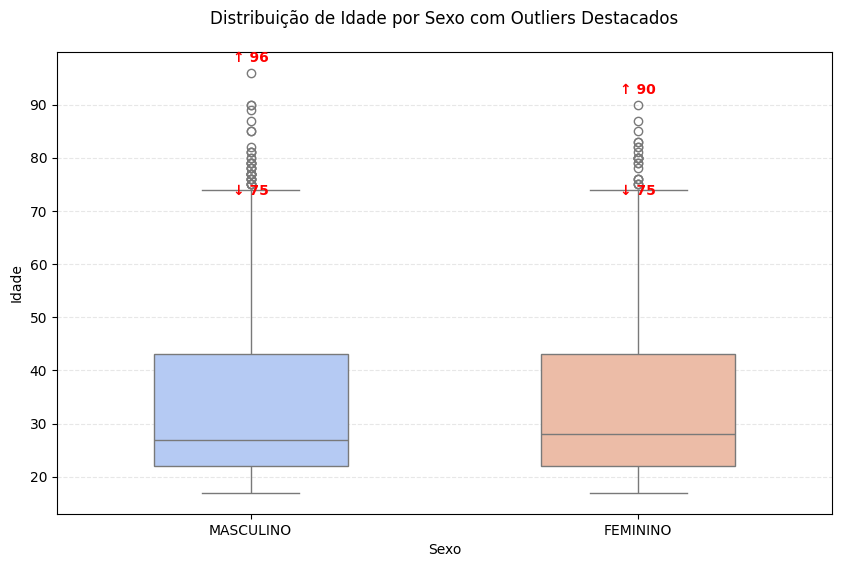

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cópia do DataFrame e cálculo da idade
df = df_original.copy()
df['Idade'] = (pd.to_datetime('today') - pd.to_datetime(df['Data Nascimento'])).dt.days // 365

# Função para calcular estatísticas detalhadas de um grupo
def get_boxplot_stats(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    maior_outlier = outliers.max() if not outliers.empty else np.nan
    menor_outlier = outliers.min() if not outliers.empty else np.nan
    
    return {
        'Q1': q1,
        'Q3': q3,
        'Mediana': data.median(),
        'Média': data.mean(),
        'Limite Inferior (Outlier)': limite_inferior,
        'Limite Superior (Outlier)': limite_superior,
        'Maior Outlier': maior_outlier,
        'Menor Outlier': menor_outlier,
        'Total Outliers': len(outliers)
    }

# Gerar estatísticas por sexo
estatisticas = {}
for sexo in df['Sexo'].unique():
    estatisticas[sexo] = get_boxplot_stats(df[df['Sexo'] == sexo]['Idade'])

# Exibir resultados formatados
for sexo, stats in estatisticas.items():
    print(f"\n📊 Estatísticas para '{sexo}':")
    print("-" * 40)
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) else f"{key}: {value}")

# Plotar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexo', y='Idade', data=df, palette='coolwarm', width=0.5)
plt.title('Distribuição de Idade por Sexo com Outliers Destacados', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionar anotações no gráfico
for i, sexo in enumerate(estatisticas.keys()):
    stats = estatisticas[sexo]
    plt.text(
        i, stats['Maior Outlier'] + 2, 
        f"↑ {stats['Maior Outlier']:.0f}", 
        ha='center', color='red', fontweight='bold'
    )
    plt.text(
        i, stats['Menor Outlier'] - 2, 
        f"↓ {stats['Menor Outlier']:.0f}", 
        ha='center', color='red', fontweight='bold'
    )

plt.show()

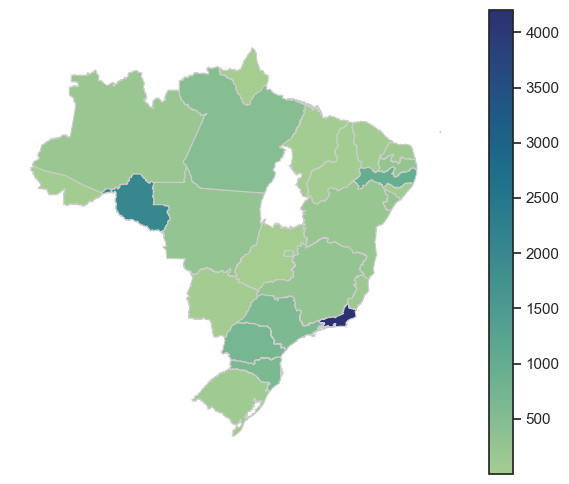

In [44]:
df = df_original.copy()

# Baixar shapefile do Brasil
brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Preparar dados
dados_mapa = df['Sigla UF Órgão'].value_counts().reset_index()
dados_mapa.columns = ['sigla', 'quantidade']

# Merge com o mapa
brasil = brasil.merge(dados_mapa, left_on='sigla', right_on='sigla', how='left')

# Plotar
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
brasil.plot(column='quantidade', cmap='crest', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.axis('off')
plt.tight_layout()
plt.show()

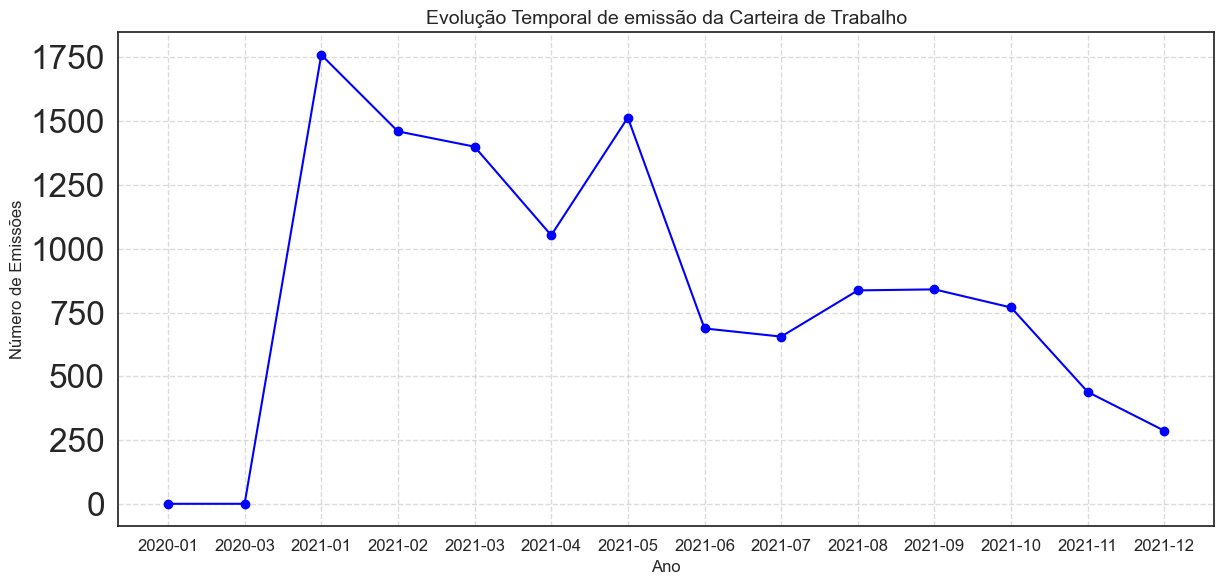

In [48]:
# Agrupar por mes
temp = df.groupby('Data Emissão').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(temp['Data Emissão'], temp['count'], marker='o', linestyle='-', color='blue')
plt.title('Evolução Temporal de emissão da Carteira de Trabalho', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Emissões', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.yticks(fontsize=24)
plt.xticks(fontsize=12)
plt.show()

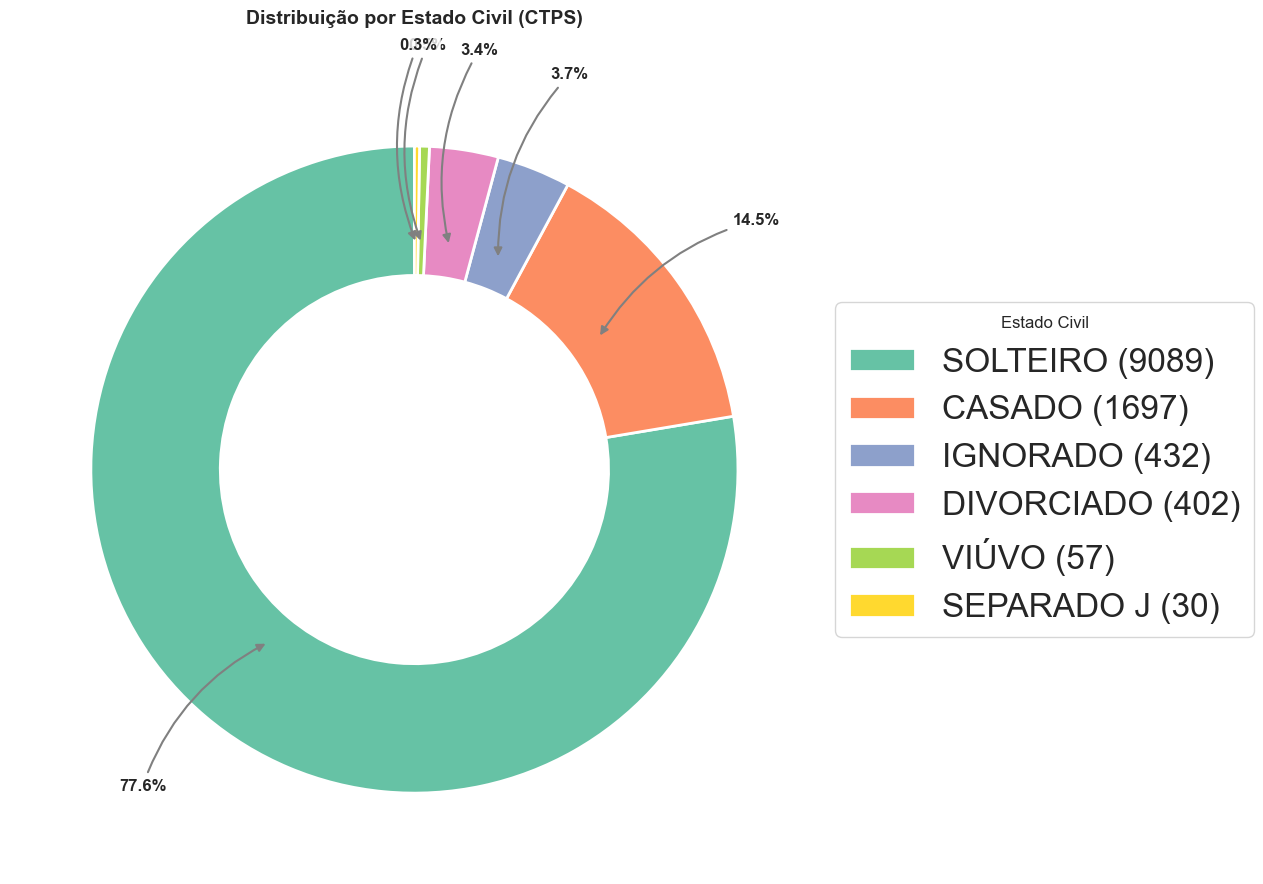

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import numpy as np

# Dados
contagem = df['Estado Civil'].value_counts()

# Cores
cores = sns.color_palette('Set2', len(contagem))

# Figura
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

# Donut
wedges, texts, autotexts = ax.pie(
    contagem,
    labels=None,  # Removemos os labels laterais
    autopct='',
    pctdistance=0.8,
    colors=cores,
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white', 'linewidth':2}
)

# Círculo central
centre_circle = plt.Circle((0,0), 0.3, fc='white')
ax.add_artist(centre_circle)

# Anotações com setas
for i, (wedge, porcentagem) in enumerate(zip(wedges, contagem/contagem.sum()*100)):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    # Posição da seta
    connectionstyle = f"arc3,rad={0.2 if x > 0 else -0.2}"
    ax.annotate(
        f'{porcentagem:.1f}%',
        xy=(x*0.7, y*0.7),
        xytext=(1.3*x, 1.3*y),
        textcoords='data',
        arrowprops=dict(
            arrowstyle='-|>',
            connectionstyle=connectionstyle,
            color='gray',
            lw=1.5
        ),
        ha='center',
        fontsize=12,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8)
    )

# Legenda
ax.legend(
    wedges,
    [f'{l} ({v})' for l, v in zip(contagem.index, contagem)],
    title='Estado Civil',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=24
)

# Título
plt.title('Distribuição por Estado Civil (CTPS)', pad=30, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Análise Crítica das Emissões de Carteira de Trabalho no Brasil (2021)

A análise utiliza dados oficiais de emissão da Carteira de Trabalho e Previdência Social (CTPS) referentes ao ano de 2021. Esta base contém registros detalhados de todas as emissões de CTPS realizadas no território nacional, incluindo informações como localidade, data de emissão, faixa etária dos trabalhadores e tipo de protocolo (primeira via, segunda via, etc.). Trata-se de um recorte temporal específico que permite avaliar o comportamento do mercado de trabalho formal no período pós-pandêmico imediato, embora a limitação a um único ano impeça análises de tendências de longo prazo.

A análise dos boxplots mostra que a faixa etária predominante nas emissões concentra-se entre 22 e 43 anos, refletindo o perfil da população economicamente ativa que está ingressando ou se reinserindo no mercado formal de trabalho. Essa distribuição etária sugere que as políticas de formalização estão atingindo principalmente adultos em idade produtiva, embora ainda apresentem desafios para incluir trabalhadores mais jovens.

Em especial, o Rio de Janeiro se destacou dos demais estanos em número de emissões da CTPS. Em 2021, o Rio de Janeiro experimentou uma recuperação econômica significativa, impulsionada pela retomada de grandes obras públicas e privadas. O programa Bairro Maravilha, por exemplo, injetou mais de R$ 1,2 bilhão na revitalização de áreas carentes da Zona Oeste e Norte da capital fluminense. Paralelamente, o governo federal retomou investimentos em infraestrutura crítica, como saneamento básico e segurança hídrica, em várias cidades do estado. Essas iniciativas geraram milhares de empregos formais, explicando em grande parte o volume expressivo de emissões de CTPS no RJ comparado a outros estados. 

A análise temporal revela picos significativos de emissões nos meses de janeiro e maio, padrão que se repete na maioria dos estados brasileiros. Esse comportamento sazonal provavelmente está relacionado aos períodos de maior contratação pelas empresas, que tradicionalmente intensificam suas admissões no início do ano (após o fechamento do exercício anterior) e no segundo trimestre (preparação para o aumento da produção no período pré-feriados de meio de ano).

No entanto, a análise baseada em dados de apenas um ano apresenta limitações significativas. A principal delas é a impossibilidade de distinguir se o crescimento observado no Rio de Janeiro representa uma recuperação pontual pós-pandemia ou faz parte de uma trajetória de crescimento mais consistente. Sem uma série histórica mais ampla, fica difícil avaliar o real impacto das políticas públicas e separar os efeitos temporários das mudanças estruturais.

Para análises futuras mais robustas, recomenda-se a inclusão de variáveis contextuais adicionais, como o PIB estadual e o volume de investimentos em infraestrutura por região. Além disso, seria valioso expandir a série temporal para abranger os anos de 2019 a 2022, o que permitiria isolar melhor os efeitos da pandemia e identificar tendências de médio prazo. Esses ajustes metodológicos proporcionariam uma compreensão mais completa das dinâmicas regionais do mercado de trabalho formal no Brasil.


## Link para a apresentação

https://www.canva.com/design/DAGrlJ70pDY/qMDvSuWl7oEhSom1gZxkGg/edit?utm_content=DAGrlJ70pDY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton